In [67]:
include("utils.jl")
include("descent_methods.jl");
using Plots;

In [68]:
himmelblau(x) = (x[1]^2 + x[2] - 11)^2 + (x[1] + x[2]^2 - 7 )^2

function rosenbrock(x)
    total = 0

    for (i, xi) in enumerate(x[:end - 1])
        total += 100*(x[i + 1] - xi^2)^2 + (1 - xi)^2
    end
    return total
end

#unzip(a) = map(x->getfield.(a, x), fieldnames(eltype(a)))
unzip(a) = [getindex.(a, i) for i in 1:length(a[1])]

function plot_points(points, metodo, nsteps)
    x, y = unzip(points)
    plot!(x, y, color = :red, title = "Caminho de otimização, $metodo, numero de pontos: $nsteps",
        size = (960 	, 	544))
end

plot_points (generic function with 2 methods)

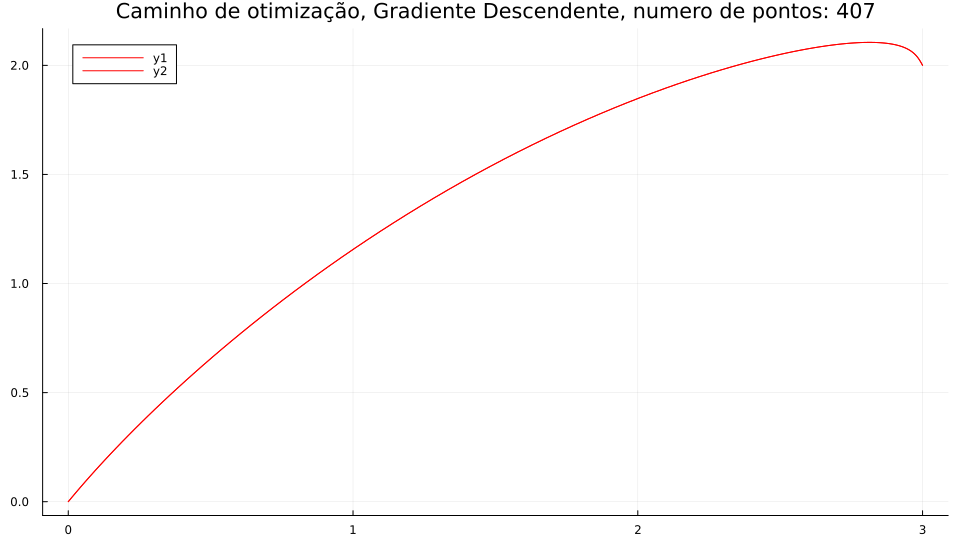

In [69]:
grad, hess = get_derivatives(himmelblau)
x0 = [0.,0.]
x_otim, nsteps, steps = grad_desc(grad, 0.001, x0, true);
plot_points(steps, "Gradiente Descendente", nsteps)